In [2]:
# type 1 => zararlı websitesi demek. İçinde virüs barındıran ya da kendi browserımızda kendi isteğimiz dışında javascript çalıştırarak bazı işlemler yapar.
# type 0 => zararsız websitesi
# Burada farklı metricler var. Bu metricleri verdiğimizde o websitesi zararlı mı zararsız mı(1 mi 0 mı) anlamaya çalışırız.
import pandas as pd
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [3]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [4]:
dataFrame.info()
# info() ile bütün kolonların non-null yani boş değere sahip olmadığını görürüz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
dataFrame.describe()
# Type 1 veya 0'dı. mean(ortalama) 0.38 çıkmış. Demek ki %38 civarı zararlı websitesi var. %62 civarı zararsız websitesi var.

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [6]:
dataFrame.corr()["Type"].sort_values()
# dataFrame içindeki kolonların Type'a göre korelasyonunu yapıyor.
# Type'a göre hangi metricler negatif hangileri pozitif bunu görürüz.
# Mesela SOURCE_K arttıkça Type'ın 1 (zararlı websitesi) olma ihtimali artar.

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [7]:
import matplotlib.pyplot as plt
import seaborn as sbn

<AxesSubplot:xlabel='Type', ylabel='count'>

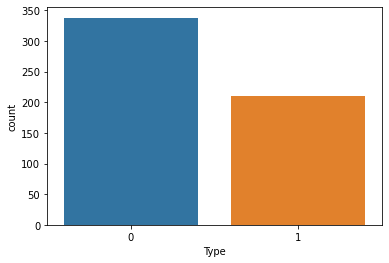

In [11]:
sbn.countplot(x="Type", data=dataFrame)

<AxesSubplot:>

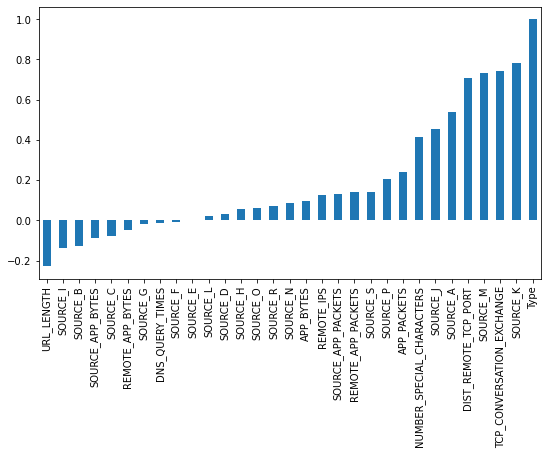

In [20]:
# Korelasyonu ekranda bar grafiği şeklinde görmek istersek .plot(kind="bar")
dataFrame.corr()["Type"].sort_values().plot(kind="bar",figsize=(9,5))

In [21]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis=1).values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# x ve y'i 2'ye böler
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
# scaler.fit ile feature(x'e) ait minimum ve maximum değerleri bulunur.
# x_train üzerinde uygulanan fit işlemi test datası(x_test) üzerinde tekrarlanmaz.
# Yalnız scaler.transform ile test datalarını yeniden ölçeklendirmek(boyutlandırmak) için kullanılır.
scaler.fit(x_train)

MinMaxScaler()

In [27]:
# transform : fit operasyonunda bulunan min ve max değerleri ile min ve max ölçeklendirme(scaling) yapılır.
# Yani veri setinin boyutları 0-1 arasında küçülüyor.
x_train = scaler.transform(x_train)

In [28]:
x_test = scaler.transform(x_test)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
# EarlyStopping ve Dropout'u özellikle overfitting problemlerini çözmek için kullanırız.
x_train.shape

(383, 30)

In [34]:
model = Sequential()

# Genelde kaç tane column varsa input layerda nöron sayımızı o sayıda yapmamız önerilir.
# Çıktı katmanı için : 1 tane nöron vermek yeterli.
# Bu kural output(Çıktı) katmanı(layer) 1 ile giriş katmanı 30 arasında herhangi bir sayı olması mantıklıdır, diyor. O sebeple 15 alındı.
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))

# Regresyonlarda output layer'a herhangi bir activation function koymamıştık.
# Ama burada sigmoid function koyuyoruz. Sigmoid function bize 0 ile 1 arasında bir değer veriyordu.
# Sınıflandırma problemlerinde output layera da Sigmoud activasyonunu kullanabilirsin.
model.add(Dense(units=1,activation="sigmoid"))


# 0 ile 1 arasında binary bir işlem yapacacağımız için burada kullanacağımız loss(maliyet) fonksiyonunun adı "binary_crossentropy".
# loss="binary_crossentropy" genelde sınıflandırma problemlerinde kullandığımız bir loss(maliyet) function'dır.
model.compile(loss="binary_crossentropy",optimizer="adam")

In [36]:
# Artık modelimizi train etmeye(eğitmeye) model.fit(..) diyerek başlıyoruz.
# Validation verisini model.fit ile daha veri eğitilirken validasyon yapılabilir hale geliyor.
# Bu da bizim daha önceki bölümde yaptığımız x_test ve y_test kıyaslama işlemlerini daha kolay hale getirir.
# epochs veri setimizin üzerinden kaç kez geçileceğini(veri setinin kaç kez işleneceğini) gösteren sayıdır. Fazla olması overfitting'e yol açar.
# Burada epochs=700 seçmesi overfitting'e yol açıyor :
model.fit(x=x_train, y=y_train, epochs=700, validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 17ms/step - loss: 0.6890 - val_loss: 0.6857
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6716 - val_loss: 0.6746
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6523 - val_loss: 0.6607
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6282 - val_loss: 0.6386
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5985 - val_loss: 0.6111
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5623 - val_loss: 0.5837
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5216 - val_loss: 0.5400
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4747 - val_loss: 0.5035
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4254 - val_loss: 0.4652
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3761 - val_loss: 0.4222
Epoch 11

12/12 [==============================] - 0s 4ms/step - loss: 0.0494 - val_loss: 0.2262
Epoch 84/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0437 - val_loss: 0.2334
Epoch 85/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.2308
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.2258
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0419 - val_loss: 0.2266
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.2360
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.2285
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.2252
Epoch 91/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0437 - val_loss: 0.2597
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0440 - val_loss: 0.2303
Epoch 93/700


12/12 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.3018
Epoch 246/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.2961
Epoch 247/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.3065
Epoch 248/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.2945
Epoch 249/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.3233
Epoch 250/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.3039
Epoch 251/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.3156
Epoch 252/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.3006
Epoch 253/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.3151
Epoch 254/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.3140
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 3.8240e-04 - val_loss: 0.4093
Epoch 405/700
12/12 [==============================] - 0s 4ms/step - loss: 4.1682e-04 - val_loss: 0.4040
Epoch 406/700
12/12 [==============================] - 0s 4ms/step - loss: 4.0791e-04 - val_loss: 0.4089
Epoch 407/700
12/12 [==============================] - 0s 4ms/step - loss: 3.8821e-04 - val_loss: 0.4047
Epoch 408/700
12/12 [==============================] - 0s 4ms/step - loss: 3.6875e-04 - val_loss: 0.4106
Epoch 409/700
12/12 [==============================] - 0s 4ms/step - loss: 3.6670e-04 - val_loss: 0.4095
Epoch 410/700
12/12 [==============================] - 0s 4ms/step - loss: 3.5866e-04 - val_loss: 0.4099
Epoch 411/700
12/12 [==============================] - 0s 4ms/step - loss: 3.5954e-04 - val_loss: 0.4110
Epoch 412/700
12/12 [==============================] - 0s 4ms/step - loss: 3.6311e-04 - val_loss: 0.4098
Epoch 413/700
12/12 [==============================] - 0s 4ms/step - 

12/12 [==============================] - 0s 4ms/step - loss: 9.4780e-05 - val_loss: 0.5034
Epoch 561/700
12/12 [==============================] - 0s 4ms/step - loss: 9.2452e-05 - val_loss: 0.5014
Epoch 562/700
12/12 [==============================] - 0s 3ms/step - loss: 9.3228e-05 - val_loss: 0.5007
Epoch 563/700
12/12 [==============================] - 0s 4ms/step - loss: 9.6906e-05 - val_loss: 0.5042
Epoch 564/700
12/12 [==============================] - 0s 4ms/step - loss: 9.0715e-05 - val_loss: 0.5016
Epoch 565/700
12/12 [==============================] - 0s 4ms/step - loss: 9.2221e-05 - val_loss: 0.5033
Epoch 566/700
12/12 [==============================] - 0s 4ms/step - loss: 8.9174e-05 - val_loss: 0.5098
Epoch 567/700
12/12 [==============================] - 0s 4ms/step - loss: 8.8886e-05 - val_loss: 0.5051
Epoch 568/700
12/12 [==============================] - 0s 4ms/step - loss: 9.1075e-05 - val_loss: 0.5049
Epoch 569/700
12/12 [==============================] - 0s 4ms/step - 

In [37]:
model.history.history # ile loss ve val_loss'u jason yani dictionary formatında görebiliriz.

{'loss': [0.6889885663986206,
  0.6715627312660217,
  0.6523272395133972,
  0.6281976699829102,
  0.5985046029090881,
  0.5623316168785095,
  0.5215814709663391,
  0.4747476279735565,
  0.4254130423069,
  0.3761397898197174,
  0.3306368589401245,
  0.2896563708782196,
  0.2542739510536194,
  0.22377771139144897,
  0.20339997112751007,
  0.18976245820522308,
  0.17291267216205597,
  0.1602785885334015,
  0.14923571050167084,
  0.14159159362316132,
  0.13460642099380493,
  0.13006851077079773,
  0.1299411654472351,
  0.12246281653642654,
  0.12183938920497894,
  0.1117735356092453,
  0.1058901771903038,
  0.10564948618412018,
  0.10378345102071762,
  0.10929413139820099,
  0.10071007162332535,
  0.09263744205236435,
  0.09022406488656998,
  0.09021051973104477,
  0.0846555158495903,
  0.08682671934366226,
  0.08232859522104263,
  0.08117551356554031,
  0.080089271068573,
  0.07978138327598572,
  0.078452467918396,
  0.07755474746227264,
  0.07446345686912537,
  0.07249188423156738,
  0.0

In [38]:
type(model.history.history) # Bu dict yapısını dataframe'e çevirip çizdiricez.

dict

In [39]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

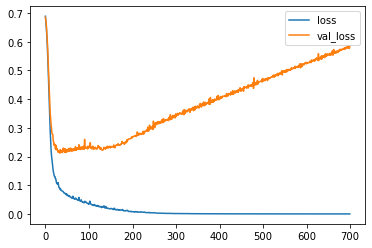

In [40]:
modelKaybi.plot()

In [42]:
# Yukarıdaki gibi overfittinge yol açmaması adına Epochs'u belli bir yerde durdurmamız gerekir.
# O yüzden EarlyStopping ile eğer val_loss saçma sapan artmaya başlarsa Epochs'u durdur, daha fazla train etme diyebiliriz.

model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))


model.add(Dense(units=1,activation="sigmoid"))


model.compile(loss="binary_crossentropy",optimizer="adam")

In [43]:
# patience  : Mesela 25 epochs sonrası modelimizde herhangi bir iyileştirme olmazsa durdurur. Bunu çok fazla vermek çok geç durmaya, çok az vermek çok erken durmaya sebep olabilir.
# patience'yi genelde 20-25 arasında tutmaya çalışırız.
# mode : auto,min ve max var. min demek val_loss'u monitor ettiğimiz izlediğimiz için val_loss'u en azda tutmaya çalıştığımız anlamına gelir.
# eğer monitor='accuracy' olsaydı yani verileri ne kadar düzgün bulabiliyor buna baksaydık mode'u max seçerdik.
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [44]:
# callbacks'i liste halinde ister o yüzden köşeli parantez yani liste içerisinde veriyoruz.
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 12ms/step - loss: 0.6780 - val_loss: 0.6901
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6632 - val_loss: 0.6829
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6474 - val_loss: 0.6745
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6269 - val_loss: 0.6601
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6036 - val_loss: 0.6401
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5765 - val_loss: 0.6171
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5431 - val_loss: 0.5908
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5022 - val_loss: 0.5473
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4506 - val_loss: 0.5004
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3976 - val_loss: 0.4625
Epoch 11

12/12 [==============================] - 0s 4ms/step - loss: 0.0620 - val_loss: 0.2516
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0549 - val_loss: 0.2601
Epoch 85/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.2558
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.2517
Epoch 87/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0560 - val_loss: 0.2588
Epoch 88/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 0.2609
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0554 - val_loss: 0.2781
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0521 - val_loss: 0.2557
Epoch 91/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.2660
Epoch 92/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0535 - val_loss: 0.2629
Epoch 93/700


In [45]:
# Epochs = 700 verilmişti demek ki Epoch'u 95 yapmamız yeterliymiş.
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

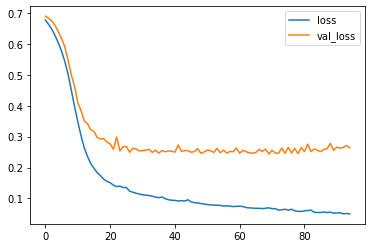

In [46]:
modelKaybi.plot() # Görüldüpü gibi val_loss ile loss arası mesafe daha dengeli hale geldi.

In [47]:
# Dropout ile verilen rate yüzde kaç ise o kadar input unit'i bizim modelimizden rastgele atmaya başlar.
# Dropout katmanına  0 dan büyük 1 den küçük bir oran veriyorsunuz. Eğitim esnasında bu oran miktarındaki bağlantıyı rastgele kapatıyor.
# Training sırasında aşırı öğrenmeyi(overfitting) engellemek için bazı nöronları unutmak için kullanılanılır diyebiliriz.
# Eğer ağınız çok büyükse, çok uzun süre training yapıyorsanız veya veri sayınız çok az ise overfitting riski taşıdığınızı unutmamanız gerekir.
# Eğer layerlar ile ilgili overfitting yaşıyorsak onlarda random bir şekilde modelimizden training süresince atılarak daha verimli bir model elde ederiz.
model = Sequential()

# model.add(Dropout(0.6)) => 30 unitin(nöronun) % 60'ını training süresince rastgele açıp kapatarak modelimizden atar.
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6)) # yüzde kaçında rastgele bir şekilde turn off yapacağımızı burada belirtiriz.

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

# Son katman hariç diğer tüm katmanlara model.add(Dropout(0.6)) ekledi. Son katmanda sadece 1 tane unit olduğu için Dropout eklemedi.
model.add(Dense(units=1,activation="sigmoid"))


model.compile(loss="binary_crossentropy",optimizer="adam")

In [48]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 15ms/step - loss: 0.6953 - val_loss: 0.6837
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.7091 - val_loss: 0.6795
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6883 - val_loss: 0.6771
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6739 - val_loss: 0.6737
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6869 - val_loss: 0.6712
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6852 - val_loss: 0.6695
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6585 - val_loss: 0.6683
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6722 - val_loss: 0.6664
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6617 - val_loss: 0.6645
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6676 - val_loss: 0.6624
Epoch 11

12/12 [==============================] - 0s 4ms/step - loss: 0.2705 - val_loss: 0.2531
Epoch 84/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2595 - val_loss: 0.2510
Epoch 85/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2675 - val_loss: 0.2576
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2681 - val_loss: 0.2535
Epoch 87/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2770 - val_loss: 0.2502
Epoch 88/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3033 - val_loss: 0.2488
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2527 - val_loss: 0.2501
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2350 - val_loss: 0.2496
Epoch 91/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2540 - val_loss: 0.2516
Epoch 92/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2877 - val_loss: 0.2518
Epoch 93/700


In [49]:
kayipDf = pd.DataFrame(model.history.history)

<AxesSubplot:>

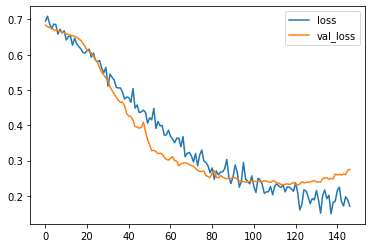

In [50]:
kayipDf.plot()

In [146]:
tahminlerimiz=model.predict(x_test)
np.argmax(tahminlerimiz,axis=1)
tahminlerimiz.round()

6/6 [==============================] - 0s 1ms/step


array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [147]:
# confusion_matrix : sınıflandırmamızın accuracy'ni yani ne kadar düzgün sonuçlar verdiğini değerlendirmek için oluşturulan matrix
from sklearn.metrics import classification_report, confusion_matrix

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,tahminlerimiz.round())

0.896969696969697

In [149]:
# Burada precision ne kadar duyarlı bir şekilde tahmin ettiğini bize gösterir.
# 0'ları 0.90  yani %90, 1'leri de 0.89 yani %89 doğru tahmin ettiğini söyler.
print(classification_report(y_test,tahminlerimiz.round()))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        91
           1       0.90      0.86      0.88        74

    accuracy                           0.90       165
   macro avg       0.90      0.89      0.90       165
weighted avg       0.90      0.90      0.90       165



In [150]:
print(confusion_matrix(y_test,tahminlerimiz.round())) # 7 tane değeri yanlış bulmuş geri kalanlar doğru.

[[84  7]
 [10 64]]
